## Multi-digit Number Recognition from Street View Imagery using Deep Convolutional Neural Networks

###### Group Members: Lin Du ld2770，Kehui Zhu kz2293, Yuchen Ma ym2644, Weibo Zhang wz2353


*Reference: https://github.com/potterhsu/SVHNClassifier

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd
import ourtext_database

In [16]:
#C(filters=f,kernel=k,s=1) P(kernel=k,stride=s) padding='same'
#primary model
    #CP(48,5|2,2) CP(64,5|2,1) CP(128,5|2,2) CP(160,5|2,1) CP(192,5|2,2) CP(192,5|2,2) CP(192,5|2,2) CP(192,5|2,2) CP(192,5|2,2) 
    #[128, 54, 54, 3]->(CP*9)->[32 * 4 * 4 * 192]-> dense=2[4 * 4 * 192] digits_dense=6[7,11*5]
#good model As Default
    #CP(48,5|2,2) CP(64,5|2,1)  CP(128,5|2,2) CP(160,5|2,1) CCP(192,5|192,5|2,2) CCP(192,5|192,5|2,2) CCCP(192,5|192,5|192,5|2,2) 
    #[128, 54, 54, 3]->(CP*4,CCP*2,CCCP*1)->[32 * 4 * 4 * 192]-> dense=2[4 * 4 * 192] digits_dense=6[7,11*5]
    ##demo step=35000 rate=0.936821
#model_text_1 using good model
    # dense=1[4 * 4 * 192] 
    # step=17000 
    
#model_text_2 using good  nironderun
    #default
    ## step=17000

#model_text_3 using good model
    # all kernel_size=3 
    ## step=17000
    
#model_text_4 paddling= 3,2
    # using model CP(48,5|3,3) CP(64,5|3,2) CP(128,5|3,1) CP(160,5|2,1) CCP(192,5|2,2) CCP(192,5|192,5|2,1) CCCP(192,5|192,5|192,5|2,2)
    #[128, 54, 54, 3]->(CP*4,CCP*2,CCCP*1)->[32 * 3 * 3 * 192]-> dense=2[3 * 3 * 192] digits_dense=6[7,11*5]
    ## step=39000 pre=0.85
    
#model_text_5 shortage filter&layer paddling=3,2
    # using model CP(30,5|3,3) CP(90,5|3,2) CP(180,5|2,1) CCP(192,5|2,2) CCP(192,5|192,5|2,1) CCCP(192,5|192,5|192,5|2,2)
    #[128, 54, 54, 3]->(CP*4,CCP*2,CCCP*1)->[32 * 5 * 5 * 192]-> dense=2[5 * 5 * 192] digits_dense=6[7,11*5]
    ## step=3000
    
#model_text_6 simple shortage filter
    # using model  #CP(24,5|2,2) CP(48,5|2,1)  CP(64,5|2,2) CP(128,5|2,1) CCP(160,5|192,5|2,2) CCP(192,5|192,5|2,2) CCCP(192,5|192,5|192,5|2,2) 
    #[128, 54, 54, 3]->(CP*4,CCP*2,CCCP*1)->[32 * 4 * 4 * 192]-> dense=2[5 * 5 * 192] digits_dense=6[7,11*5]
    ## step=3000
    
#model_text_7 simple shortage filter
    # using model  #CP(24,5|2,2) CP(48,5|2,1)  CP(64,5|2,2) CP(128,5|2,1) CCP(160,5|192,5|2,2) CCP(192,5|192,5|2,2) CCCP(192,5|192,5|192,5|2,2) 
    #[128, 54, 54, 3]->(CP*4,CCP*2,CCCP*1)->[32 * 4 * 4 * 192]-> dense=2[5 * 5 * 192] digits_dense=6[7,11*5]
    ## step=3000    

#model33text=???


In [17]:
ourtext_database.model_text_3
#ourtext_database.

'> 2018-12-17 03:36:03.773373: step 100, loss = 7.825383 (57.1 examples/sec)=> 2018-12-17 03:36:45.682289: step 200, loss = 6.926432 (76.4 examples/sec)=> 2018-12-17 03:37:27.591562: step 300, loss = 6.937031 (76.4 examples/sec)=> 2018-12-17 03:38:09.372735: step 400, loss = 6.529932 (76.6 examples/sec)=> 2018-12-17 03:38:51.028165: step 500, loss = 6.431801 (76.8 examples/sec)=> 2018-12-17 03:39:32.636596: step 600, loss = 6.235023 (76.9 examples/sec)=> 2018-12-17 03:40:14.210166: step 700, loss = 6.674021 (77.0 examples/sec)=> 2018-12-17 03:40:55.694617: step 800, loss = 7.183585 (77.1 examples/sec)=> 2018-12-17 03:41:37.246743: step 900, loss = 6.842922 (77.0 examples/sec)=> 2018-12-17 03:42:18.705473: step 1000, loss = 6.081688 (77.2 examples/sec)==> accuracy = 0.043478, best accuracy 0.000000=> 2018-12-17 03:44:27.666063: step 1100, loss = 5.338964 (77.2 examples/sec)=> 2018-12-17 03:45:09.155590: step 1200, loss = 6.350661 (77.1 examples/sec)=> 2018-12-17 03:45:50.820596: step 13

In [18]:
pattern_loss = re.compile(r'loss = \d.\d+')
pattern_accuracy=re.compile(r' accuracy = \d.\d+')

In [19]:
def get_loss(data):
    results = pattern_loss.findall(data)
    loss=[re.sub(r'loss = ','',result) for result in results]
    loss=[float(item) for item in loss]
    loss=np.array(loss)
    xlabel=100*np.arange(1,1+len(loss))
    return xlabel,loss

In [60]:
_,loss=get_loss(ourtext_database.model_text_3)
loss

array([7.825383, 6.926432, 6.937031, 6.529932, 6.431801, 6.235023,
       6.674021, 7.183585, 6.842922, 6.081688, 5.338964, 6.350661,
       4.947772, 5.007609, 5.467885, 4.120806, 3.538748, 3.918617,
       3.010329, 3.859855, 2.743831, 3.615383, 3.189612, 3.329175,
       3.259444, 2.529315, 2.04085 , 1.861279, 1.732963, 1.179314,
       1.528957, 2.447804, 1.121612, 1.128439, 1.490637, 1.537704,
       2.239595, 1.488783, 1.483115, 1.632385, 0.910603, 2.012977,
       0.787164, 1.144536, 2.382068, 2.580159, 1.680448, 1.614756,
       1.133621, 0.816216, 0.957452, 0.506637, 1.035684, 1.647039,
       1.126728, 0.888875, 0.880704, 1.254857, 1.056074, 0.916247,
       0.801138, 0.922682, 1.188087, 1.260435, 1.109577, 1.445254,
       0.776664, 1.482431, 0.602766, 0.647421, 1.025157, 1.441535,
       0.511033, 1.179535, 1.345289, 0.84372 , 0.966955, 3.368572,
       0.986243, 0.62061 , 0.864005, 0.488855, 0.492607, 1.780721,
       0.383611, 0.5652  , 0.612679, 1.076017, 1.537303, 0.478

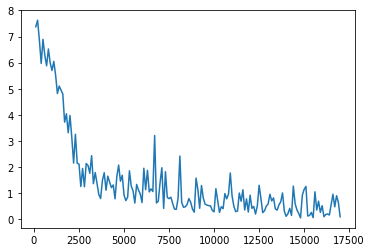

In [20]:
xlabel,loss=get_loss(ourtext_database.model_text_2)
plt.plot(xlabel,loss)


In [21]:
get_accuracy(ourtext_database.model_text_3)[0]

array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
       10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000])

In [38]:
def get_accuracy(data):
    result2 = pattern_accuracy.findall(data)
    accuracy=[re.sub(r' accuracy = ','',result) for result in result2]
    accuracy=[float(item) for item in accuracy]
    accuracy=np.array(accuracy)
    xlabel=1000*np.arange(1,1+len(accuracy))
    return xlabel,accuracy

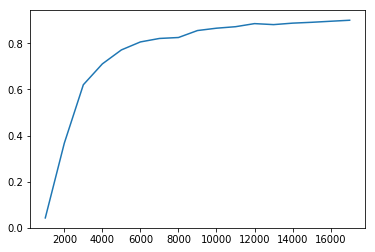

In [23]:
acx_1,accuracy_1=get_accuracy(ourtext_database.model_text_3)
plt.plot(acx_1,accuracy_1)

In [62]:
get_accuracy(ourtext_database.model_text_4)

(array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
        10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000,
        19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000,
        28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000,
        37000]),
 array([0.013556, 0.021453, 0.05152 , 0.112627, 0.309333, 0.423522,
        0.509291, 0.563387, 0.608657, 0.663387, 0.67973 , 0.680448,
        0.713049, 0.720861, 0.743877, 0.755532, 0.761867, 0.772677,
        0.780152, 0.794552, 0.815372, 0.812458, 0.814358, 0.802618,
        0.824367, 0.83522 , 0.833108, 0.838936, 0.84223 , 0.831715,
        0.854223, 0.850338, 0.860051, 0.845524, 0.861064, 0.863851,
        0.860853]))

In [25]:
acx_1,accuracy_1=get_accuracy(ourtext_database.model_text_1)
acx_2,accuracy_2=get_accuracy(ourtext_database.model_text_2)

In [26]:
# data1=ourtext_database.model_text_1
# data2=ourtext_database.model_text_2
# _,accuracy_1=get_accuracy(data1)
# _,accuracy_2=get_accuracy(data2)
# accuracy_min=  min(len(accuracy_1),len(accuracy_2))
# accuracy_label=np.arange(1,1+accuracy_min)
# print data1[0:accuracy_min]

# ax1.plot(accuracy_label, data1[0:accuracy_min],label="data1")
# ax1.plot(accuracy_label, data2[0:accuracy_min],label="data2")
# ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# _,loss_1=get_loss(data1)
# _,loss_1=get_loss(data2)
# loss_min=min(len(loss_1),len(loss_2))
# loss_label=np.arange(1,1+loss_min)
# ax2.plot(loss_label, data1[0:loss_min],label="data1")
# ax2.plot(loss_label, data2[0:loss_min],label="data2")
# ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [27]:
def compare(data1,data2):
    f,(ax1, ax2) = plt.subplots(1, 2, sharey=True)
    _,accuracy_1=get_accuracy(data1)
    _,accuracy_2=get_accuracy(data2)
    accuracy_min=  min(len(accuracy_1),len(accuracy_1))
    accuracy_label=np.arange(1,1+accuracy_min)
    ax1.plot(accuracy_label, accuracy_1[0:accuracy_min],label="data1")
    ax1.plot(accuracy_label, accuracy_2[0:accuracy_min],label="data2")
    ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    _,loss_1=get_loss(data1)
    _,loss_2=get_loss(data2)
    loss_min=min(len(loss_1),len(loss_2))
    loss_label=np.arange(1,1+loss_min)
    ax2.plot(loss_label, loss_1[0:loss_min],label="data1")
    ax2.plot(loss_label, loss_2[0:loss_min],label="data2")
    ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [28]:
#compare(ourtext_database.model_text_1,ourtext_database.model_text_2)


In [65]:
def compare_ac(data1,data2):
    _,accuracy_1=get_accuracy(data1)
    _,accuracy_2=get_accuracy(data2)
    accuracy_min=  min(len(accuracy_1),len(accuracy_1))
    accuracy_label=1000*np.arange(1,1+accuracy_min)
    plt.plot(accuracy_label, accuracy_1[0:accuracy_min],label="kernel size=5")
    plt.plot(accuracy_label, accuracy_2[0:accuracy_min],label="kernel size=3")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
def compare_loss(data1,data2):
    _,loss_1=get_loss(data1)
    _,loss_2=get_loss(data2)
    loss_min=min(len(loss_1),len(loss_2))
    loss_label=100*np.arange(1,1+loss_min)
    plt.plot(loss_label, loss_1[0:loss_min],label="kernel size=5")
    plt.plot(loss_label, loss_2[0:loss_min],label="kernel size=3")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5,0,'accuracy of model with kernel size=5 versus kernel size=3')

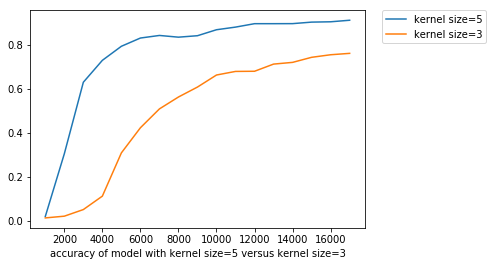

In [63]:
compare_ac(ourtext_database.model_text_2,ourtext_database.model_text_4)
plt.xlabel("accuracy of model with kernel size=5 versus kernel size=3")

Text(0.5,0,'losses of model with kernel size=5 versus kernel size=3 ')

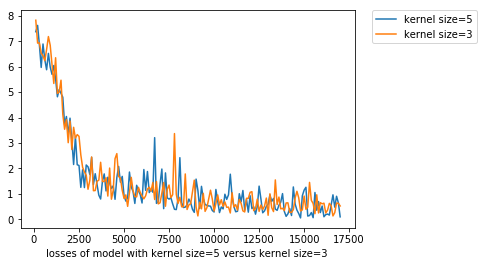

In [66]:
compare_loss(ourtext_database.model_text_2,ourtext_database.model_text_3)
plt.xlabel("losses of model with kernel size=5 versus kernel size=3 ")

In [ ]:
|